# Jupyter Notebook for the Stock Prediction Data Analysis ( SPDA )

## Data Source : https://www.kaggle.com/qks1lver/amex-nyse-nasdaq-stock-histories

# Development stages

### 1. [Dataset formatting and freature extraction](#dataset_formatting_and_extraction)
### 2. [Manual model development](#manual_model_development)
### 3. [AutoML development](#automl_development)
### 4. [Model Training and Testing](#model_training_and_testing)

---
---

# Dataset formatting and feature extraction<a id='dataset_formatting_and_extraction'></a>

## a. Setup the links to the data file to be used for model training and testing

In [70]:
# System library for path management
from os import path

# Set the patha for the training and test datafiles
user_home_dir = str(path.expanduser('~'))
print('Home directory for the current user : ', user_home_dir)

Home directory for the current user :  /home/abhi


In [71]:
# Add path to the sample data file for training and testing models
sample_file_path = path.join(user_home_dir,
                                  'university/mlh-2018/AAL.csv')
print('Path to the data file currently being used : ', sample_file_path)

Path to the data file currently being used :  /home/abhi/university/mlh-2018/AAL.csv


## b. Read the data file into a dataframe to be pre-processed

In [72]:
# Import the system built-in modules needed for feature extraction
import os
import time
from datetime import datetime

In [73]:
# Import the essential data processing libraries
import pandas as pd
import numpy as np

In [74]:
# Import visualization libraries for plotting and visualizing the dataset 
# vectors
import matplotlib.pyplot as plt

In [75]:
% matplotlib inline

In [76]:
# Read in the dataset from the csv file, and convert to a Pandas dataframe
sample_dataframe = pd.read_csv(sample_file_path, engine='python', encoding='utf-8 sig')
display(sample_dataframe)

,date,volume,open,close,high,low,adjclose
0,2018-11-16,9832851,37.400002,36.750000,37.529999,36.500000,36.750000
1,2018-11-15,8296700,37.869999,37.820000,38.160000,36.310001,37.820000
2,2018-11-14,7288400,38.000000,38.110001,38.590000,37.450001,38.110001
3,2018-11-13,9694100,37.150002,37.779999,38.419998,37.099998,37.779999
4,2018-11-12,9360800,36.310001,36.860001,37.299999,35.779999,36.860001
5,2018-11-09,6794400,36.700001,36.220001,37.259998,36.029999,36.220001
6,2018-11-08,6884800,36.770000,36.860001,37.049999,35.970001,36.860001
7,2018-11-07,10904000,35.570000,36.970001,37.389999,35.480000,36.970001
8,2018-11-06,11376700,35.599998,35.169998,35.959999,34.840000,35.169998
9,2018-11-05,11305300,36.349998,35.720001,36.520000,35.130001,35.720001


In [78]:
# Convert the date format in the dataframe into POSIX Timestamps

default_timestamps = sample_dataframe['date'].values
show_values = 5

# Initialize the list for storing POSIX timestamps
posix_timestamps = []

# Transform the datetime into POSIX datetime
for i in range(default_timestamps.shape[0]):
    
    # Collect the logged time value
    timestamp_logged = default_timestamps[i]    
    
    # Convert the logged default timestamp to POSIX and add to the list
    posix_timestamps.append(datetime.strptime(timestamp_logged, '%Y-%m-%d'))
    posix_timestamps[i] = time.mktime(posix_timestamps[i].timetuple())

# Add the list to the dataframe
sample_dataframe['Timestamp'] = posix_timestamps

# Set the POSIX timestamp column to be the index of the dataframe
#sample_dataframe.set_index('Timestamp', inplace=True)

# Sort the POSIX timestamp values in the dataframe
sample_dataframe.sort_values(by=['Timestamp'], inplace=True)

# Give a preview of the re-index dataframe
print('Showing the first %d values from the dataframe.' %(show_values))
sample_dataframe.head(show_values)

Showing the first 5 values from the dataframe.


,date,volume,open,close,high,low,adjclose,Timestamp
3309,2005-09-27,961200,21.049999,19.299999,21.400000,19.100000,18.489122,1.127797e+09
3308,2005-09-28,5747900,19.299999,20.500000,20.530001,19.200001,19.638702,1.127884e+09
3307,2005-09-29,1078200,20.400000,20.209999,20.580000,20.100000,19.360884,1.127970e+09
3306,2005-09-30,3123300,20.260000,21.010000,21.049999,20.180000,20.127277,1.128056e+09
3305,2005-10-03,1057900,20.900000,21.500000,21.750000,20.900000,20.596684,1.128316e+09


## Plot the values in the given dataset

In [79]:
# Extract the values to plot from the dataframe
timestamps = sample_dataframe['Timestamp'].values

df_cols = list(sample_dataframe.columns.values)
df_cols.remove('date')
df_cols.remove('Timestamp')
df_cols.remove('volume')

data_values = []
for col in df_cols:
    values = list(sample_dataframe[col].values)
    data_values.append(values)
 
display(len(data_values))

5

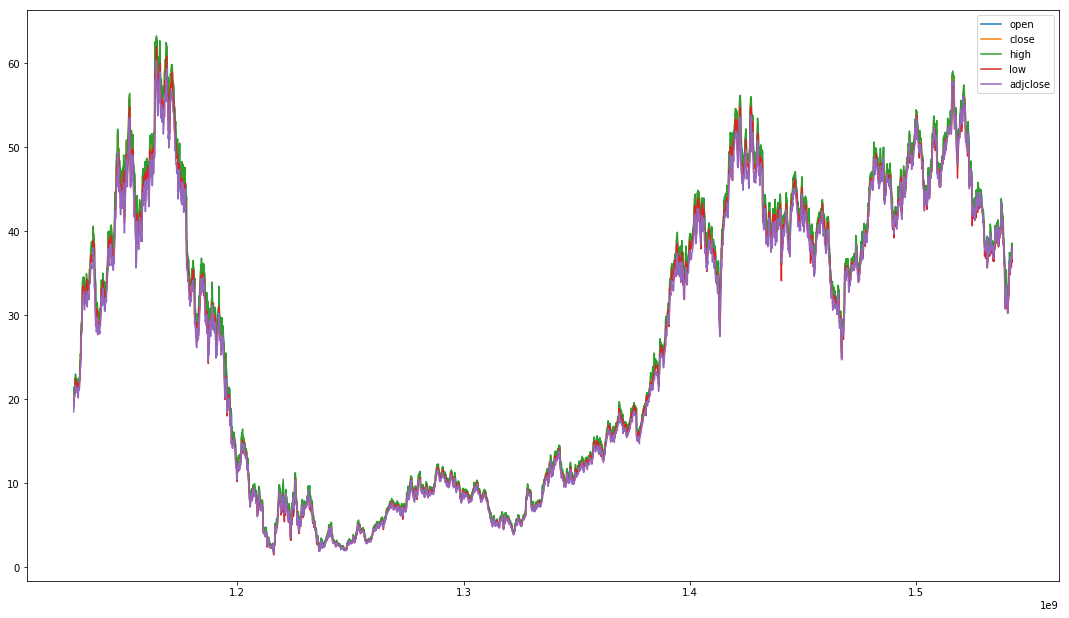

In [80]:
# Import the plotting library
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('original_dataset.png', dpi=100)
fig.set_size_inches(18.5, 10.5, forward=True)

for i in range(len(data_values)):
    plt.plot(timestamps, data_values[i])

plt.legend(df_cols)
plt.show()
#plt.plot(timestam)

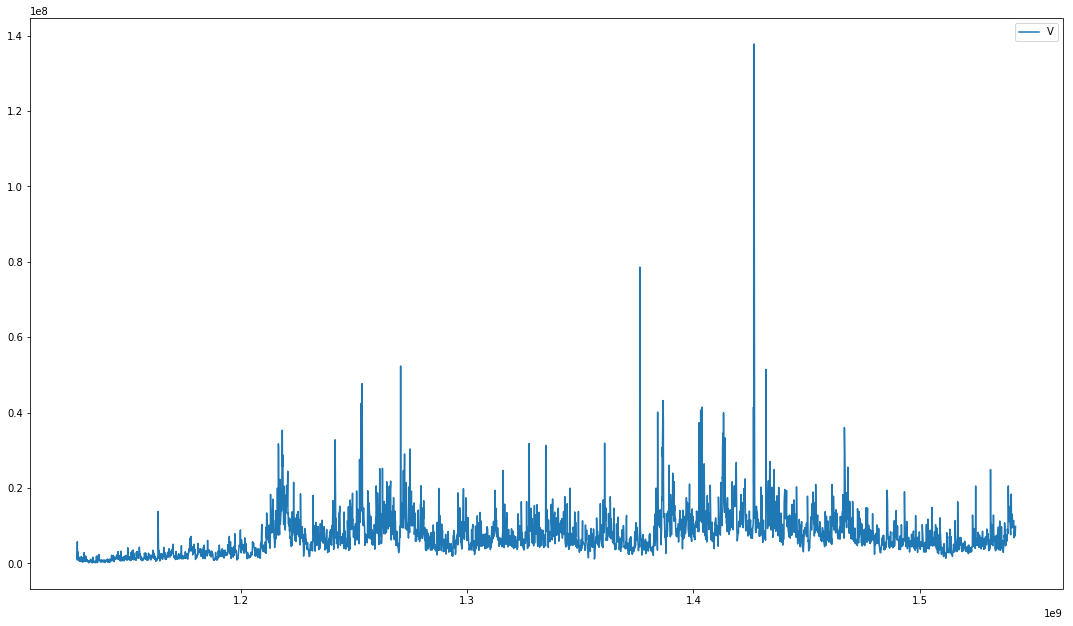

In [81]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('original_dataset_volumne.png', dpi=100)
fig.set_size_inches(18.5, 10.5, forward=True)

plt.plot(timestamps, sample_dataframe['volume'])
plt.legend('Volume')
plt.show()

## Now that the dataframe are constructed, we can start the feature extraction and normalization

In [82]:
# Initialize the list to hold the normalized data valuess
scaled_features = []

# Approach 1 : Using the data from previous 7 days to predict the next day
from sklearn.preprocessing import MinMaxScaler

# Normalize and scale each one of the input features and construct the 
# scaler array for doing inverse scaling later
sample_df_cols = list(sample_dataframe.columns.values)
sample_df_cols.remove('date')

scaler_array = []
scaled_features_dict = {}

for col in sample_df_cols:
    
    # Initialize the scaler for the given feature
    # Range : -1...1
    scaler = MinMaxScaler(feature_range=(-1,1), copy=True)
    
    # Extract the features and fit the scaler
    feature_list = sample_dataframe[col].values.reshape(-1,1)
    scaler.fit(feature_list)
    
    # Add th scaler to the dictionary
    scaler_array.append(scaler)
    
    # Transform the feature dataset
    scaled_feature_list = scaler.transform(feature_list)
    scaled_features.append(scaled_feature_list)
    scaled_features_dict[col] = scaled_feature_list
    
display(scaled_features)

/home/abhi/anaconda3/envs/dev1/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


[array([[-0.98804464],
        [-0.91848503],
        [-0.98634442],
        ...,
        [-0.89609871],
        [-0.88144624],
        [-0.85912312]]), array([[-0.36804076],
        [-0.42552146],
        [-0.38939072],
        ...,
        [ 0.18870092],
        [ 0.18443089],
        [ 0.1689933 ]]), array([[-0.42670374],
        [-0.38748162],
        [-0.39696032],
        ...,
        [ 0.18810264],
        [ 0.17862393],
        [ 0.14365091]]), array([[-0.36740694],
        [-0.39581971],
        [-0.39418681],
        ...,
        [ 0.19399085],
        [ 0.17994773],
        [ 0.15937291]]), array([[-0.41701072],
        [-0.41370766],
        [-0.38398017],
        ...,
        [ 0.18909994],
        [ 0.15144513],
        [ 0.15772089]]), array([[-0.4267036 ],
        [-0.38748159],
        [-0.39696036],
        ...,
        [ 0.24273242],
        [ 0.23283801],
        [ 0.19633117]]), array([[-1.        ],
        [-0.99958316],
        [-0.99916633],
        ...,
      

In [90]:
# Construct the Numpy array to hold the data values
scaled_features = np.array(scaled_features)
scaled_features = np.transpose(scaled_features).reshape(scaled_features.shape[0], scaled_features.shape[1])
scaled_features = np.transpose(scaled_features)

print(scaled_features.shape)
# Determine the dimenstions on the input dataset
print('Dimensions of the input dataset : ', scaled_features.shape)

(3310, 7)
Dimensions of the input dataset :  (3310, 7)


## Split the dataset into training and testing 

In [91]:
def make_dataset_batchable(data_array_in, desired_ratio, batch_size):
      
      # Length of the input dataset and number of batches available
      data_length = data_array_in.shape[0]
      num_batches = int(data_length/batch_size)
      
      # Length of the usable dataset with the given batches
      data_use_len = num_batches * batch_size
      
      if data_use_len < data_length:
          # Format and remove the extra datapoints from the datasets
          actual_data_in = np.delete(data_array_in, np.s_[data_use_len::], axis=0)
      else:
          actual_data_in = data_array_in
      
      # Size of training and testing sets initially available
      train_length = int(desired_ratio * data_use_len)
      test_length = int((1 - desired_ratio) * data_use_len)
      
      # Number of testing and training initially batches available
      num_train_batches = int(train_length / batch_size)
      num_test_batches = int(test_length / batch_size)
      
      # NUmber of data points not used for training and testing
      leftover = data_use_len - (num_train_batches*batch_size) - (
              num_test_batches*batch_size)
      
      # Number of batches available after initial splitting
      leftover_batches = leftover / batch_size
      
      # Calculate the best ratio to use and increase the training size
      actual_ratio = float((batch_size*num_train_batches)+(batch_size*
                      leftover_batches)) / float(data_use_len)
      
      return actual_ratio, actual_data_in

In [92]:
# Make the dataset batchable for the training and testing

batch_size = 7
test_train_ratio = 0.75

ratio_to_use, scaled_features = make_dataset_batchable(scaled_features,
                                                      test_train_ratio,
                                                      batch_size)

In [93]:
# Determine the dimenstions on the input dataset
print('Dimensions of the input dataset : ', scaled_features.shape)

Dimensions of the input dataset :  (3304, 7)


## Now that the input dataset is guaranteed to be batchable, create the training and testing batches

In [94]:
def split_dataset(data_set_in, train_test_ratio):
      
     # Determine the length of the training and testing arrays
     train_size = int(len(data_set_in) * train_test_ratio)
    
     # Split the dataset
     train, test = data_set_in[0:train_size][:], data_set_in[train_size:len(data_set_in)][:]
     
     return train, test

In [95]:
train_dataset, test_dataset = split_dataset(scaled_features, ratio_to_use)

In [96]:
# Display the training dataset to be used for training the network
print('Displaying the training dataset with size : ', train_dataset.shape)
display(train_dataset)

Displaying the training dataset with size :  (2478, 7)


array([[-0.98804464,  0.35479649, -0.68883801, ...,  0.16198564,
        -0.03167091, -0.55679034],
       [ 0.35293146, -0.89108667, -0.90920967, ...,  0.34964694,
        -0.76779523, -0.96638928],
       [ 0.22372938, -0.88690961, -0.04746267, ...,  0.08504338,
        -0.85553196,  0.86127165],
       ...,
       [ 0.55780533,  0.27637144, -0.82807649, ..., -0.85896982,
        -0.77792293, -0.75656735],
       [-0.13122024, -0.62246077, -0.88744644, ..., -0.47344332,
        -0.89127936,  0.19399085],
       [ 0.39225205, -0.67380292,  0.7976793 , ..., -0.7642064 ,
        -0.6398357 ,  0.30464767]])

In [97]:
# Display the testing dataset to be used for testing the network
print('Displaying the testing dataset with size : ', test_dataset.shape)
display(test_dataset)

Displaying the testing dataset with size :  (826, 7)


array([[-0.53691164, -0.93176569,  0.3404151 , ..., -0.74445721,
         0.50222957,  0.5093658 ],
       [-0.87481614, -0.08318351, -0.91472709, ..., -0.52395509,
         0.79832487, -0.08439306],
       [-0.88331358, -0.08001304,  0.67586969, ...,  0.4701899 ,
         0.62649692, -0.68883806],
       ...,
       [-0.88375244, -0.81450033, -0.61442602, ..., -0.4979356 ,
        -0.88753944,  0.15476384],
       [ 0.26728182, -0.77401874,  0.27663083, ..., -0.86337637,
        -0.23549586, -0.91686182],
       [-0.56009145, -0.49811121,  0.79865328, ..., -0.93541463,
         0.21391249,  0.33572756]])

## Now that the features have been scaled, construct the supervised dataset for generating predictions

## Reshape the input dataset

In [98]:
# Construct the supervised dataset for training the models

# Define the dimenstions of the input dataset to be used for training the
# model

num_past_timestamps = 7
num_future_predictions = 1
num_features = len(sample_df_cols)
num_samples = len(scaled_features[0])

# Method for converting the input dataset to a supervised training dataset
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [99]:
training_input_data = series_to_supervised(data=train_dataset,
                                       n_in=num_past_timestamps,
                                      n_out=num_future_predictions)

In [100]:
test_input_data = series_to_supervised(data=test_dataset,
                                       n_in=num_past_timestamps,
                                      n_out=num_future_predictions)

In [101]:
display(training_input_data)

,var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),var6(t-7),var7(t-7),var1(t-6),var2(t-6),var3(t-6),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
7,-0.988045,0.354796,-0.688838,0.800296,0.161986,-0.031671,-0.556790,0.352931,-0.891087,-0.909210,...,0.455140,-0.891847,-0.888635,-0.714050,0.254065,-0.680264,-0.863667,0.625429,-0.201830,-0.893907
8,0.352931,-0.891087,-0.909210,0.351161,0.349647,-0.767795,-0.966389,0.223729,-0.886910,-0.047463,...,0.625429,-0.201830,-0.893907,0.169282,0.436020,-0.754208,0.438797,-0.883598,-0.683214,-0.597336
9,0.223729,-0.886910,-0.047463,0.293926,0.085043,-0.855532,0.861272,-0.836428,-0.897453,-0.947461,...,-0.883598,-0.683214,-0.597336,0.657086,-0.446078,-0.831970,0.276352,0.105081,-0.754968,0.488026
10,-0.836428,-0.897453,-0.947461,0.618985,-0.762510,-0.966282,0.005066,-0.686223,-0.954344,0.533965,...,0.105081,-0.754968,0.488026,0.551901,-0.873836,-0.575094,-0.880021,-0.610712,-0.480187,0.440631
11,-0.686223,-0.954344,0.533965,0.202157,-0.944762,0.003138,-0.824938,-0.678315,-0.832414,0.256035,...,-0.610712,-0.480187,0.440631,0.104542,-0.851794,0.636186,0.239084,-0.796026,0.091660,0.669014
12,-0.678315,-0.832414,0.256035,-0.864575,-0.922484,0.318189,-0.494362,-0.970110,0.404638,0.319288,...,-0.796026,0.091660,0.669014,-0.712371,-0.826769,-0.966613,-0.265186,-0.364307,-0.000163,0.545169
13,-0.970110,0.404638,0.319288,-0.748979,0.455140,-0.891847,-0.888635,-0.714050,0.254065,-0.680264,...,-0.364307,-0.000163,0.545169,-0.887849,0.833769,0.269396,-0.791099,-0.846408,0.785729,-0.529008
14,-0.714050,0.254065,-0.680264,-0.863667,0.625429,-0.201830,-0.893907,0.169282,0.436020,-0.754208,...,-0.846408,0.785729,-0.529008,-0.978101,-0.894862,0.236773,-0.247193,0.400229,0.423947,-0.919778
15,0.169282,0.436020,-0.754208,0.438797,-0.883598,-0.683214,-0.597336,0.657086,-0.446078,-0.831970,...,0.400229,0.423947,-0.919778,-0.341933,0.538558,-0.565446,-0.819323,0.902443,0.175029,-0.834613
16,0.657086,-0.446078,-0.831970,0.276352,0.105081,-0.754968,0.488026,0.551901,-0.873836,-0.575094,...,0.902443,0.175029,-0.834613,0.187059,0.279556,-0.130895,-0.086452,0.128984,-0.892361,-0.807642


In [102]:
display(test_input_data)

,var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),var6(t-7),var7(t-7),var1(t-6),var2(t-6),var3(t-6),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
7,-0.536912,-0.931766,0.340415,0.398595,-0.744457,0.502230,0.509366,-0.874816,-0.083184,-0.914727,...,-0.203791,-0.888544,0.170636,0.519922,-0.173395,0.558751,0.015359,-0.918315,-0.804703,0.766968
8,-0.874816,-0.083184,-0.914727,-0.637165,-0.523955,0.798325,-0.084393,-0.883314,-0.080013,0.675870,...,-0.918315,-0.804703,0.766968,-0.460010,-0.973576,0.976223,0.116849,-0.755189,0.492856,0.390268
9,-0.883314,-0.080013,0.675870,-0.766793,0.470190,0.626497,-0.688838,-0.964046,-0.920479,-0.530046,...,-0.755189,0.492856,0.390268,-0.057515,-0.543063,0.477126,-0.837012,-0.948400,0.526300,0.136476
10,-0.964046,-0.920479,-0.530046,-0.406841,0.043521,0.167630,-0.902666,0.570542,0.345634,-0.890294,...,-0.948400,0.526300,0.136476,-0.815690,-0.992504,0.241052,-0.783298,0.055346,0.218485,0.059599
11,0.570542,0.345634,-0.890294,-0.658464,0.743229,-0.525086,-0.980389,-0.940745,0.223710,-0.290127,...,0.055346,0.218485,0.059599,-0.798987,0.453344,-0.857849,-0.948073,-0.973305,0.536213,-0.732783
12,-0.940745,0.223710,-0.290127,0.441085,0.269364,-0.830017,-0.107773,0.218064,-0.688290,-0.882081,...,-0.973305,0.536213,-0.732783,-0.986625,0.208367,-0.799640,-0.793069,0.548661,0.177147,-0.980716
13,0.218064,-0.688290,-0.882081,0.859109,-0.203791,-0.888544,0.170636,0.519922,-0.173395,0.558751,...,0.548661,0.177147,-0.980716,0.231049,-0.905454,-0.746571,-0.856191,0.441616,-0.876135,-0.959946
14,0.519922,-0.173395,0.558751,0.015359,-0.918315,-0.804703,0.766968,-0.460010,-0.973576,0.976223,...,0.441616,-0.876135,-0.959946,0.499918,-0.585553,-0.803580,0.667864,0.293861,-0.824481,0.254780
15,-0.460010,-0.973576,0.976223,0.116849,-0.755189,0.492856,0.390268,-0.057515,-0.543063,0.477126,...,0.293861,-0.824481,0.254780,-0.628163,-0.792946,-0.739060,0.081623,-0.715607,-0.844185,0.626083
16,-0.057515,-0.543063,0.477126,-0.837012,-0.948400,0.526300,0.136476,-0.815690,-0.992504,0.241052,...,-0.715607,-0.844185,0.626083,-0.316555,-0.954015,-0.215524,0.410593,-0.690145,0.930054,-0.935631


In [103]:
# Reshape the supervised dataset into the 3-D format for the LSTM
# Input format : [samples, timestamps, features]
training_input_data = np.array(training_input_data)
display(training_input_data)
training_input_data = training_input_data.reshape(training_input_data.shape[0],
                                         num_past_timestamps+1,
                                         num_features)

array([[-0.98804464,  0.35479649, -0.68883801, ...,  0.62542903,
        -0.20183023, -0.89390705],
       [ 0.35293146, -0.89108667, -0.90920967, ..., -0.88359841,
        -0.6832136 , -0.59733572],
       [ 0.22372938, -0.88690961, -0.04746267, ...,  0.10508072,
        -0.75496796,  0.48802642],
       ...,
       [ 0.28422797, -0.91263741, -0.74885695, ..., -0.85896982,
        -0.77792293, -0.75656735],
       [ 0.22340246, -0.75714986,  0.28559699, ..., -0.47344332,
        -0.89127936,  0.19399085],
       [-0.91873643, -0.75996081,  0.84083079, ..., -0.7642064 ,
        -0.6398357 ,  0.30464767]])

In [104]:
print('Displaying the input training dataset ready for input to RNNs : ')
display(training_input_data)

Displaying the input training dataset ready for input to RNNs : 


array([[[-0.98804464,  0.35479649, -0.68883801, ...,  0.16198564,
         -0.03167091, -0.55679034],
        [ 0.35293146, -0.89108667, -0.90920967, ...,  0.34964694,
         -0.76779523, -0.96638928],
        [ 0.22372938, -0.88690961, -0.04746267, ...,  0.08504338,
         -0.85553196,  0.86127165],
        ...,
        [-0.67831482, -0.83241427,  0.25603543, ..., -0.92248419,
          0.31818924, -0.49436173],
        [-0.97011003,  0.40463751,  0.31928825, ...,  0.45514003,
         -0.89184669, -0.88863488],
        [-0.71405   ,  0.25406475, -0.68026424, ...,  0.62542903,
         -0.20183023, -0.89390705]],

       [[ 0.35293146, -0.89108667, -0.90920967, ...,  0.34964694,
         -0.76779523, -0.96638928],
        [ 0.22372938, -0.88690961, -0.04746267, ...,  0.08504338,
         -0.85553196,  0.86127165],
        [-0.83642801, -0.89745264, -0.9474612 , ..., -0.76251031,
         -0.96628174,  0.00506612],
        ...,
        [-0.97011003,  0.40463751,  0.31928825, ...,  

In [105]:
# Display the dimensions of the input training and testing data
print('Shape of training data :', training_input_data.shape[0])

Shape of training data : 2471


In [106]:
# Reshape the supervised dataset into the 3-D format for the LSTM
# Input format : [samples, timestamps, features]
test_input_data = np.array(test_input_data)
display(test_input_data)
test_input_data = test_input_data.reshape(test_input_data.shape[0],
                                         num_past_timestamps+1,
                                         num_features)

array([[-0.53691164, -0.93176569,  0.3404151 , ..., -0.918315  ,
        -0.8047028 ,  0.76696838],
       [-0.87481614, -0.08318351, -0.91472709, ..., -0.75518867,
         0.4928559 ,  0.39026774],
       [-0.88331358, -0.08001304,  0.67586969, ..., -0.94839974,
         0.52630023,  0.13647559],
       ...,
       [ 0.22417479, -0.81932287, -0.98657257, ..., -0.4979356 ,
        -0.88753944,  0.15476384],
       [ 0.06626836, -0.89050498,  0.59207272, ..., -0.86337637,
        -0.23549586, -0.91686182],
       [-0.75061932, -0.96645322,  0.14234348, ..., -0.93541463,
         0.21391249,  0.33572756]])

In [107]:
print('Displaying the input testing dataset ready for input to RNNs : ')
display(test_input_data)

Displaying the input testing dataset ready for input to RNNs : 


array([[[-0.53691164, -0.93176569,  0.3404151 , ..., -0.74445721,
          0.50222957,  0.5093658 ],
        [-0.87481614, -0.08318351, -0.91472709, ..., -0.52395509,
          0.79832487, -0.08439306],
        [-0.88331358, -0.08001304,  0.67586969, ...,  0.4701899 ,
          0.62649692, -0.68883806],
        ...,
        [-0.94074492,  0.22370998, -0.29012705, ...,  0.2693642 ,
         -0.83001656, -0.10777269],
        [ 0.21806394, -0.68829036, -0.88208093, ..., -0.20379145,
         -0.88854388,  0.17063558],
        [ 0.5199216 , -0.1733954 ,  0.55875144, ..., -0.918315  ,
         -0.8047028 ,  0.76696838]],

       [[-0.87481614, -0.08318351, -0.91472709, ..., -0.52395509,
          0.79832487, -0.08439306],
        [-0.88331358, -0.08001304,  0.67586969, ...,  0.4701899 ,
          0.62649692, -0.68883806],
        [-0.96404642, -0.9204788 , -0.53004572, ...,  0.04352115,
          0.16763003, -0.90266565],
        ...,
        [ 0.21806394, -0.68829036, -0.88208093, ..., -

## Now that the input dataset is ready, construct the output dataset for training and testing

In [108]:
# Create the output dataset for the training and testing the model
def create_output(data, n_in, n_out, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(1, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [109]:
# Create the train and test output dataset

train_output = create_output(data=train_dataset,
                            n_in=0,
                            n_out=2,
                            dropnan=True)


train_output.drop(index=[0,1,2,3,4,5], inplace=True)
display(train_output)

train_output

,var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var6(t+1),var7(t+1)
6,-0.714050,0.254065,-0.680264,-0.863667,0.625429,-0.201830,-0.893907
7,0.169282,0.436020,-0.754208,0.438797,-0.883598,-0.683214,-0.597336
8,0.657086,-0.446078,-0.831970,0.276352,0.105081,-0.754968,0.488026
9,0.551901,-0.873836,-0.575094,-0.880021,-0.610712,-0.480187,0.440631
10,0.104542,-0.851794,0.636186,0.239084,-0.796026,0.091660,0.669014
11,-0.712371,-0.826769,-0.966613,-0.265186,-0.364307,-0.000163,0.545169
12,-0.887849,0.833769,0.269396,-0.791099,-0.846408,0.785729,-0.529008
13,-0.978101,-0.894862,0.236773,-0.247193,0.400229,0.423947,-0.919778
14,-0.341933,0.538558,-0.565446,-0.819323,0.902443,0.175029,-0.834613
15,0.187059,0.279556,-0.130895,-0.086452,0.128984,-0.892361,-0.807642


,var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var6(t+1),var7(t+1)
6,-0.714050,0.254065,-0.680264,-0.863667,0.625429,-0.201830,-0.893907
7,0.169282,0.436020,-0.754208,0.438797,-0.883598,-0.683214,-0.597336
8,0.657086,-0.446078,-0.831970,0.276352,0.105081,-0.754968,0.488026
9,0.551901,-0.873836,-0.575094,-0.880021,-0.610712,-0.480187,0.440631
10,0.104542,-0.851794,0.636186,0.239084,-0.796026,0.091660,0.669014
11,-0.712371,-0.826769,-0.966613,-0.265186,-0.364307,-0.000163,0.545169
12,-0.887849,0.833769,0.269396,-0.791099,-0.846408,0.785729,-0.529008
13,-0.978101,-0.894862,0.236773,-0.247193,0.400229,0.423947,-0.919778
14,-0.341933,0.538558,-0.565446,-0.819323,0.902443,0.175029,-0.834613
15,0.187059,0.279556,-0.130895,-0.086452,0.128984,-0.892361,-0.807642


In [110]:
test_output = create_output(data=test_dataset,
                            n_in=0,
                            n_out=2,
                            dropnan=True)


test_output.drop(index=[0,1,2,3,4,5], inplace=True)
display(test_output)

,var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var6(t+1),var7(t+1)
6,0.519922,-0.173395,0.558751,0.015359,-0.918315,-0.804703,0.766968
7,-0.460010,-0.973576,0.976223,0.116849,-0.755189,0.492856,0.390268
8,-0.057515,-0.543063,0.477126,-0.837012,-0.948400,0.526300,0.136476
9,-0.815690,-0.992504,0.241052,-0.783298,0.055346,0.218485,0.059599
10,-0.798987,0.453344,-0.857849,-0.948073,-0.973305,0.536213,-0.732783
11,-0.986625,0.208367,-0.799640,-0.793069,0.548661,0.177147,-0.980716
12,0.231049,-0.905454,-0.746571,-0.856191,0.441616,-0.876135,-0.959946
13,0.499918,-0.585553,-0.803580,0.667864,0.293861,-0.824481,0.254780
14,-0.628163,-0.792946,-0.739060,0.081623,-0.715607,-0.844185,0.626083
15,-0.316555,-0.954015,-0.215524,0.410593,-0.690145,0.930054,-0.935631


In [111]:
# Extract the data from the dataframes
train_output_np = train_output.values
test_output_np = test_output.values

print(train_output_np)
print(test_output_np)

[[-0.71405     0.25406475 -0.68026424 ...  0.62542903 -0.20183023
  -0.89390705]
 [ 0.16928153  0.4360199  -0.75420822 ... -0.88359841 -0.6832136
  -0.59733572]
 [ 0.65708647 -0.44607765 -0.83196964 ...  0.10508072 -0.75496796
   0.48802642]
 ...
 [ 0.55780533  0.27637144 -0.82807649 ... -0.85896982 -0.77792293
  -0.75656735]
 [-0.13122024 -0.62246077 -0.88744644 ... -0.47344332 -0.89127936
   0.19399085]
 [ 0.39225205 -0.67380292  0.7976793  ... -0.7642064  -0.6398357
   0.30464767]]
[[ 0.5199216  -0.1733954   0.55875144 ... -0.918315   -0.8047028
   0.76696838]
 [-0.46000986 -0.97357556  0.97622294 ... -0.75518867  0.4928559
   0.39026774]
 [-0.05751478 -0.5430626   0.47712628 ... -0.94839974  0.52630023
   0.13647559]
 ...
 [-0.88375244 -0.81450033 -0.61442602 ... -0.4979356  -0.88753944
   0.15476384]
 [ 0.26728182 -0.77401874  0.27663083 ... -0.86337637 -0.23549586
  -0.91686182]
 [-0.56009145 -0.49811121  0.79865328 ... -0.93541463  0.21391249
   0.33572756]]


In [112]:
print(train_output_np.shape[0])

2471


# Manual model development<a id='manual_model_development'></a>

## Model 1 : LSTM Neural Network

### Goal - Initialize and implement the manual LSTM model and train using the given dataset

In [113]:
# Layer and Model Initializers from Keras
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Bidirectional, GRU

# Visualizers for the model
from keras.utils import plot_model

# Optimizizers for training and network performance
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, RMSprop, SGD

Using TensorFlow backend.


In [114]:
"""# fit an LSTM network to training data
def fit_lstm(train_in, train_out, batch_size, nb_epoch, neurons):
    X, y = train_in, train_out
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(train_out.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model"""

"# fit an LSTM network to training data\ndef fit_lstm(train_in, train_out, batch_size, nb_epoch, neurons):\n    X, y = train_in, train_out\n    X = X.reshape(X.shape[0], 1, X.shape[1])\n    model = Sequential()\n    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))\n    model.add(Dense(train_out.shape[1]))\n    model.compile(loss='mean_squared_error', optimizer='adam')\n    for i in range(nb_epoch):\n        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)\n        model.reset_states()\n    return model"

In [115]:
"""# Initialize the neural network model
opt = SGD(lr=0.05, nesterov=True)
batch_size = 4
past_timesteps = 1

# Define the network model and layers
input_1 = Input(batch_shape=(batch_size, past_timesteps))
dense_2 = LSTM(units=5, activation='relu')(input_1)
dense_3 = Dense(units=10, activation='relu')(dense_2)
dense_6 = Dense(units=10, activation='sigmoid')(dense_3)
dense_7 = Dense(units=5, activation='relu')(dense_6)
output_1 = Dense(units=1)(dense_7)
        
# Generate and compile the model
predictor = Model(inputs=input_1, outputs=output_1)
predictor.compile(optimizer= opt, loss= 'mae', metrics=['mape', 'mse', 'mae'])
predictor.summary()"""

"# Initialize the neural network model\nopt = SGD(lr=0.05, nesterov=True)\nbatch_size = 4\npast_timesteps = 1\n\n# Define the network model and layers\ninput_1 = Input(batch_shape=(batch_size, past_timesteps))\ndense_2 = LSTM(units=5, activation='relu')(input_1)\ndense_3 = Dense(units=10, activation='relu')(dense_2)\ndense_6 = Dense(units=10, activation='sigmoid')(dense_3)\ndense_7 = Dense(units=5, activation='relu')(dense_6)\noutput_1 = Dense(units=1)(dense_7)\n        \n# Generate and compile the model\npredictor = Model(inputs=input_1, outputs=output_1)\npredictor.compile(optimizer= opt, loss= 'mae', metrics=['mape', 'mse', 'mae'])\npredictor.summary()"

In [116]:
opt = SGD(lr=0.05, nesterov=True)
batch_size = 7
past_timestamps = 8
num_features = len(sample_df_cols)

# Define the network model and layers
input_1 = Input(batch_shape=(batch_size, past_timestamps, num_features))
lstm_1 = LSTM(units=7, stateful=True, return_sequences=True)(input_1)
lstm_2 = LSTM(units=52, stateful=True)(lstm_1)
dense_1 = Dense(units=10, activation='sigmoid')(lstm_2)
dense_2 = Dense(units=5, activation='relu')(dense_1)
output_1 = Dense(units=num_features)(dense_2)

# Generate and compile the model
predictor = Model(inputs=input_1, outputs=output_1)
predictor.compile(optimizer=opt, loss='mse', metrics=['mape',
                                                     'mse',
                                                     'mae'])
predictor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (7, 8, 7)                 0         
_________________________________________________________________
lstm_1 (LSTM)                (7, 8, 7)                 420       
_________________________________________________________________
lstm_2 (LSTM)                (7, 52)                   12480     
_________________________________________________________________
dense_1 (Dense)              (7, 10)                   530       
_________________________________________________________________
dense_2 (Dense)              (7, 5)                    55        
_________________________________________________________________
dense_3 (Dense)              (7, 7)                    42        
Total params: 13,527
Trainable params: 13,527
Non-trainable params: 0
_________________________________________________________________


In [117]:
num_epochs = 100
predictor.fit(x=training_input_data, y=train_output_np, 
              batch_size=batch_size, epochs=num_epochs, verbose=2,
             shuffle=False)

Epoch 1/100
 - 15s - loss: 0.3617 - mean_absolute_percentage_error: 234.9359 - mean_squared_error: 0.3617 - mean_absolute_error: 0.5522
Epoch 2/100
 - 13s - loss: 0.3571 - mean_absolute_percentage_error: 243.6958 - mean_squared_error: 0.3571 - mean_absolute_error: 0.5503
Epoch 3/100
 - 17s - loss: 0.3571 - mean_absolute_percentage_error: 243.7018 - mean_squared_error: 0.3571 - mean_absolute_error: 0.5502
Epoch 4/100
 - 14s - loss: 0.3570 - mean_absolute_percentage_error: 243.6960 - mean_squared_error: 0.3570 - mean_absolute_error: 0.5502
Epoch 5/100
 - 13s - loss: 0.3570 - mean_absolute_percentage_error: 243.6892 - mean_squared_error: 0.3570 - mean_absolute_error: 0.5502
Epoch 6/100
 - 13s - loss: 0.3570 - mean_absolute_percentage_error: 243.0822 - mean_squared_error: 0.3570 - mean_absolute_error: 0.5502
Epoch 7/100
 - 13s - loss: 0.3570 - mean_absolute_percentage_error: 243.3638 - mean_squared_error: 0.3570 - mean_absolute_error: 0.5501
Epoch 8/100
 - 13s - loss: 0.3568 - mean_absolut

Epoch 61/100
 - 14s - loss: 0.1541 - mean_absolute_percentage_error: 204.2079 - mean_squared_error: 0.1541 - mean_absolute_error: 0.2960
Epoch 62/100
 - 13s - loss: 0.1537 - mean_absolute_percentage_error: 204.0156 - mean_squared_error: 0.1537 - mean_absolute_error: 0.2959
Epoch 63/100
 - 13s - loss: 0.1534 - mean_absolute_percentage_error: 203.8605 - mean_squared_error: 0.1534 - mean_absolute_error: 0.2958
Epoch 64/100
 - 13s - loss: 0.1532 - mean_absolute_percentage_error: 203.7560 - mean_squared_error: 0.1532 - mean_absolute_error: 0.2958
Epoch 65/100
 - 13s - loss: 0.1529 - mean_absolute_percentage_error: 203.6907 - mean_squared_error: 0.1529 - mean_absolute_error: 0.2957
Epoch 66/100
 - 13s - loss: 0.1527 - mean_absolute_percentage_error: 203.6445 - mean_squared_error: 0.1527 - mean_absolute_error: 0.2957
Epoch 67/100
 - 13s - loss: 0.1526 - mean_absolute_percentage_error: 203.6006 - mean_squared_error: 0.1526 - mean_absolute_error: 0.2956
Epoch 68/100
 - 13s - loss: 0.1524 - mean

In [ ]:
test_predictions = predictor.predict(x=test_input_data,
                                    batch_size=batch_size, verbose=2)

In [ ]:
display(test_predictions)

In [ ]:
display(test_predictions.shape)

In [ ]:
# Need to create a transpose of the 2-D array for inverse scaling
test_output = np.transpose(test_predictions)

for i in range(test_output.shape[0]):
    test_output[i].reshape(-1,1)
    
display(test_output)
display(test_output.shape)

In [ ]:
transformed_values = []

for i in range(test_output.shape[0]):
    values = np.array(list(test_output[i]))
    values = values.reshape(-1,1)
    transformed_values.append(scaler_array[i].inverse_transform(values))
    
display(transformed_values)

In [ ]:
# Generate np array for the predictions
transformed_values_np = np.array(transformed_values)
display(transformed_values_np.shape)

In [ ]:
# Plot the predictions generated by the neural network
predictions_df = pd.DataFrame(
    transformed_values_np.reshape(transformed_values_np.shape[0],
                              transformed_values_np.shape[1]))
display(predictions_df)

In [ ]:
transformed_values_np = transformed_values_np.reshape(transformed_values_np.shape[0],
                              transformed_values_np.shape[1])
display(transformed_values_np)
display(transformed_values_np.shape)

In [ ]:
transformed_values_array = list(transformed_values_np)
display(len(transformed_values_array))
display(len(transformed_values_array[0]))
#for i in range(transformed_values_np.shape[0]):
    #transformed_values_array.append(transformed_values_np[i])
display(transformed_values_array)

In [ ]:
volume_predictions = transformed_values_array[0]
display(len(volume_predictions))

In [ ]:
volume_actual = sample_dataframe['volume'].values[train_output_np.shape[0]+20:]
timestamps_predictions = timestamps[train_output_np.shape[0]+20:]

print(len(volume_actual))
print(len(timestamps_predictions))

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('volume_predictioss.png', dpi=100)
fig.set_size_inches(18.5, 10.5, forward=True)

plt.plot(timestamps_predictions, volume_predictions)
plt.plot(timestamps_predictions, volume_actual)

plt.legend(['Predictions', 'Actual'])
plt.show()
#plt.plot(timestam)

In [ ]:
volume_predictions = transformed_values_array[1]
display(len(volume_predictions))

volume_actual = sample_dataframe['open'].values[train_output_np.shape[0]+20:]
timestamps_predictions = timestamps[train_output_np.shape[0]+20:]

print(len(volume_actual))
print(len(timestamps_predictions))

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('open_predictions.png', dpi=50)
fig.set_size_inches(18.5, 10.5, forward=True)

plt.plot(timestamps_predictions, volume_predictions)
plt.plot(timestamps_predictions, volume_actual)

plt.legend(['Predictions', 'Actual'])
plt.show()
#plt.plot(timestam)

In [ ]:
volume_predictions = transformed_values_array[2]
display(len(volume_predictions))

volume_actual = sample_dataframe['close'].values[train_output_np.shape[0]+20:]
timestamps_predictions = timestamps[train_output_np.shape[0]+20:]

print(len(volume_actual))
print(len(timestamps_predictions))

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('close_predictions.png', dpi=50)
fig.set_size_inches(18.5, 10.5, forward=True)

plt.plot(timestamps_predictions, volume_predictions)
plt.plot(timestamps_predictions, volume_actual)

plt.legend(['Predictions', 'Actual'])
plt.show()

# Check how the model did on the training data

In [ ]:
batch_size = 7
train_predictions = predictor.predict(x=training_input_data,
                                    batch_size=batch_size, verbose=2)

In [ ]:
# Need to create a transpose of the 2-D array for inverse scaling
train_output = np.transpose(train_predictions)

for i in range(train_output.shape[0]):
    train_output[i].reshape(-1,1)
    
display(train_output)
display(train_output.shape)

In [ ]:
transformed_values_2 = []

for i in range(train_output.shape[0]):
    values = np.array(list(train_output[i]))
    values = values.reshape(-1,1)
    transformed_values_2.append(scaler_array[i].inverse_transform(values))
    
display(transformed_values_2)

In [ ]:
# Generate np array for the predictions
transformed_values_np_2 = np.array(transformed_values_2)
display(transformed_values_np_2.shape)

In [ ]:
transformed_values_array_2 = list(transformed_values_np_2)
display(len(transformed_values_array_2))
display(len(transformed_values_array_2[0]))
#for i in range(transformed_values_np.shape[0]):
    #transformed_values_array.append(transformed_values_np[i])
display(transformed_values_array_2)

In [ ]:
volume_predictions = transformed_values_array_2[0]
display(len(volume_predictions))

In [ ]:
volume_actual = sample_dataframe['volume'].values[:len(volume_predictions)]
timestamps_predictions = timestamps[:len(volume_predictions)]

print(len(volume_actual))
print(len(timestamps_predictions))

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('volume_predictioss.png', dpi=50)
fig.set_size_inches(18.5, 10.5, forward=True)

plt.plot(timestamps_predictions, volume_predictions)
plt.plot(timestamps_predictions, volume_actual)

plt.legend(['Predictions', 'Actual'])
plt.show()

# AutoML model development<a id='automl_development'></a>

## Options for the libraries to use :

### 1. Auto-Keras
### 2. Auto-sklearn
### 3. TPOT
### 4. H20.ai

## 1. Model Development using AutoKeras

In [ ]:
# Import the AutoML libraries
import autokeras as ak
#import ak.supervised